In [2]:
import numpy as np
from scipy.misc import imread
import glob
from skimage import util 
from skimage import io as io
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# DEMO OF WIERD NOTATION
lst = np.array(list(range(5)))
print(lst, type(lst))

# A few different ways to add 3
print(lst + 3)  # works with numpy

# This doesn't work with normal list
try:
    print(list(lst) + 3)
except TypeError as e:
    print(type(e), e)

# For loop
print()
print('FOR LOOP')
add_three = []
for n in lst:
    print(n)
    add_three.append(n+3)
    print(add_three)


# MAGIC
print('ADVANCED TOPICS')
add_three = [n + 3 for n in lst]
print(add_three)

add_three = [print('INSIDE', n) for n in lst]
print(add_three)

add_three = [print('INSIDE', n) for n in lst if n == 3]
print(add_three)

[0 1 2 3 4] <class 'numpy.ndarray'>
[3 4 5 6 7]
<class 'TypeError'> can only concatenate list (not "int") to list

FOR LOOP
0
[3]
1
[3, 4]
2
[3, 4, 5]
3
[3, 4, 5, 6]
4
[3, 4, 5, 6, 7]
ADVANCED TOPICS
[3, 4, 5, 6, 7]
INSIDE 0
INSIDE 1
INSIDE 2
INSIDE 3
INSIDE 4
[None, None, None, None, None]
INSIDE 3
[None]


In [4]:
pwd

'/Users/cgroschner/Documents/pythonDev/particleRecognition'

In [5]:
os.getcwd()

'/Users/cgroschner/Documents/pythonDev/particleRecognition'

In [6]:
a = np.reshape(np.array(range(10)),(1,-1))
print(a)
print(a.shape)
b = np.append(a,a,axis=0)
print(b)

[[0 1 2 3 4 5 6 7 8 9]]
(1, 10)
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


In [7]:
try:
    path = "/Users/cgroschner/Box Sync/Research/Training Data/SegmentedImages_DotNoFringe"    
    path2 = "/Users/cgroschner/Box Sync/Research/Training Data/SegmentedImage_Nothing"

    name = "."
    length1 = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
    length2 = len([name for name in os.listdir(path2) if os.path.isfile(os.path.join(path2, name))])
except:
    path = "/Users/kategroschner/Box Sync/Research/Training Data/SegmentedImages_DotNoFringe"    
    path2 = "/Users/kategroschner/Box Sync/Research/Training Data/SegmentedImage_Nothing"

    name = "."
    length1 = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
    length2 = len([name for name in os.listdir(path2) if os.path.isfile(os.path.join(path2, name))])

path = path + "/*.png"    
path2 = path2 +"/*.png"

label = 1 #to indicate contains particle
label2 = 0 #indicates contains no particle


i = 0
for fname in glob.glob(path):
    #files = io.imread_collection(fname,True)
    im = np.array(imread(fname,flatten=True))
    if i == 0:
        data = np.reshape(im,(1,-1))
        data = np.append(data,np.reshape(np.rot90(im,1),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,2),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,3),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.flipud(im),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.fliplr(im),(1,-1)),axis = 0)
        
    else:
        data = np.append(data,np.reshape(im,(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,1),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,2),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,3),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.flipud(im),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.fliplr(im),(1,-1)),axis = 0)
    i = i+1   

(210, 16384)


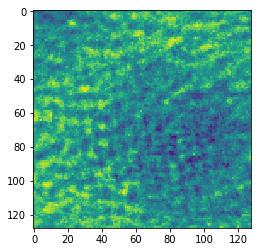

In [8]:
plt.imshow(data[0,:].reshape((128,128)))
print(data.shape)

In [9]:
j = 0
for fname in glob.glob(path2):
    #files = io.imread_collection(fname,True)
    im = np.array(imread(fname,flatten=True))
    if j == 0:
        data2 = np.reshape(im,(1,-1))     
    else:
        data2 = np.append(data2,np.reshape(im,(1,-1)),axis = 0)
    j = j+1  

In [10]:
data3 = data2[0:210,:]
print(data3.shape)

(210, 16384)


In [11]:
total_data = np.concatenate((data,data2[0:210,:]),axis = 0)

In [42]:
#data = np.empty([16384,length1])
target = np.ones([(length1)*6,])
#data2 = np.empty([16384,length2])
target2 = np.zeros([210,])
print(target2.shape)
print(target.shape)

(210,)
(210,)


In [13]:
print(data.shape)
print(length1)


(210, 16384)
35


In [14]:
total_data.shape

(420, 16384)

In [43]:
total_targets = np.concatenate((target,target2),axis =0)

In [44]:
total_targets.shape

(420,)

In [17]:
np.save('ttldata_nnptl_tf',total_data)
np.save('ttltargets_nnptl_tf',total_targets)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [45]:
data_train, data_test, target_train, target_test = train_test_split(total_data, total_targets, test_size=0.25, random_state=42)

In [51]:
clf = svm.SVC(probability=True)
clf.fit(data_train, target_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
prediticions = clf.predict(data_test)

In [22]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(target_test,prediticions)

array([[51,  0],
       [54,  0]])

In [54]:
clf.score(data_test, target_test)

0.48571428571428571

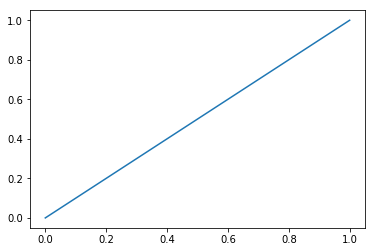

In [55]:
from sklearn.metrics import roc_curve
probs = clf.predict_proba(data_test)
fpr, tpr, thresholds = roc_curve(target_test, probs[:, 1])
plt.plot(fpr, tpr)

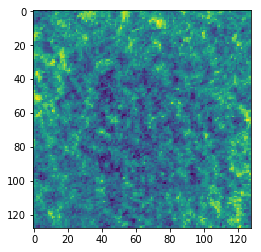

In [32]:
plt.imshow(data_test[0,:].reshape((128,128)))

In [33]:
print(target_test[0,0])

1.0


In [62]:
clf.predict(data_test[50].reshape(1,-1))

array([ 0.])

In [57]:
data_test[0].shape

(16384,)

In [38]:
data_test.shape

(105, 16384)

In [39]:
data_test[0,:].shape

(16384,)

In [40]:
target_test.shape

(105, 1)

In [80]:
truenum =target_test[target_test == 1]

In [82]:
print(truenum)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [68]:
print(target_test)

[ 1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.
  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.
  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.
  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.]


In [79]:
target_test == 1

array([ True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False, False, False,  True,  True, False,  True,  True,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False], dtype=bool)

In [83]:
from sklearn.linear_model import SGDClassifier

In [84]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(data_train,target_train)

/Users/cgroschner/Documents/pythonDev/particleRecognition/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
cross_val_score(sgd_clf,data_train,target_train,cv=3,scoring="accuracy")

array([ 0.93333333,  0.78095238,  0.93333333])

In [87]:
from sklearn.model_selection import cross_val_predict

In [88]:
target_train_pred = cross_val_predict(sgd_clf,data_train,target_train,cv=3)
confusion_matrix(target_train,target_train_pred)

array([[152,   7],
       [ 30, 126]])

In [89]:
target_scores = cross_val_predict(sgd_clf,data_train,target_train,cv=3,method = "decision_function")

In [91]:
from sklearn.metrics import precision_recall_curve
if target_scores.ndim ==2:
    target_scores=target_scores[:,1]
    
precisions, recalls, thresholds = precision_recall_curve(target_train, target_scores)

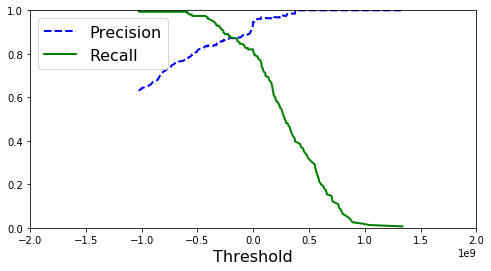

In [100]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-2e9, 2e9])
plt.show()

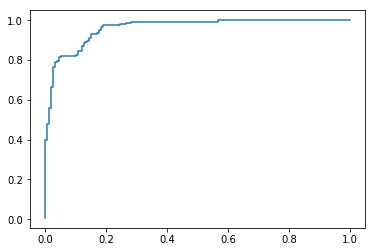

In [94]:
sgd_fpr, sgd_tpr, sgd_thresholds = roc_curve(target_train, target_scores)
plt.plot(sgd_fpr, sgd_tpr)

In [98]:
len(thresholds)

246

In [99]:
print(thresholds)

[ -1.02744841e+09  -1.02345075e+09  -1.01549308e+09  -1.00156402e+09
  -9.99306082e+08  -9.98409987e+08  -9.76694929e+08  -9.61018311e+08
  -9.43742803e+08  -9.37592903e+08  -9.30361620e+08  -9.18341225e+08
  -9.12287999e+08  -9.07255765e+08  -9.02588184e+08  -9.01709599e+08
  -8.89364851e+08  -8.75765920e+08  -8.56902100e+08  -8.53229089e+08
  -8.53213657e+08  -8.45668853e+08  -8.45604036e+08  -8.40131710e+08
  -8.38702227e+08  -8.30538342e+08  -8.22625124e+08  -8.20209362e+08
  -8.20065302e+08  -8.14374545e+08  -8.03486190e+08  -8.00360958e+08
  -7.81764501e+08  -7.80306409e+08  -7.75301280e+08  -7.51936551e+08
  -7.42390966e+08  -7.35303086e+08  -7.34199897e+08  -7.26298581e+08
  -7.11626251e+08  -7.01420551e+08  -6.99804379e+08  -6.96645590e+08
  -6.28179699e+08  -6.20500698e+08  -5.93411607e+08  -5.92035184e+08
  -5.86319538e+08  -5.80860734e+08  -5.80278235e+08  -5.73859670e+08
  -5.59911005e+08  -5.54282025e+08  -5.51563262e+08  -5.47250097e+08
  -5.37274204e+08  -5.34084614e+08

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
forest_clf = RandomForestClassifier(random_state=42)
target_probas_forest = cross_val_predict(forest_clf,data_train,target_train,cv=3,method="predict_proba")

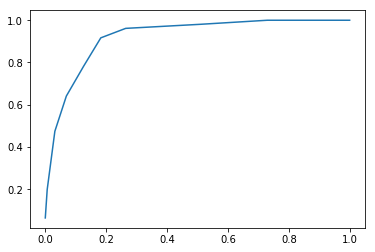

In [103]:
target_scores_forest = target_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(target_train,target_scores_forest)

plt.plot(fpr_forest,tpr_forest)

In [108]:
target_pred_forest = cross_val_predict(forest_clf,data_train,target_train,cv=3)
confusion_matrix(target_train,target_pred_forest)

array([[139,  20],
       [ 34, 122]])

In [109]:
target_pred_svm = cross_val_predict(clf,data_train,target_train,cv=3)
confusion_matrix(target_train,target_pred_svm)

array([[159,   0],
       [156,   0]])

In [110]:
from sklearn.metrics import roc_auc_score

In [111]:
roc_auc_score(target_train,target_scores)

0.96117561683599417

In [112]:
roc_auc_score(target_train,target_scores_forest)

0.92212949524270282

In [113]:
target_scores_svm = cross_val_predict(clf,data_train,target_train,cv=3,method = "decision_function")

In [115]:
roc_auc_score(target_train,target_scores_svm[:,1])

0.5